In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/healthcare-investments-and-length-of-hospital-stay/Healthcare_Investments_and_Hospital_Stay (1).csv


In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.6 MB/s eta 0:00:00


In [3]:
df = pd.read_csv("/kaggle/input/healthcare-investments-and-length-of-hospital-stay/Healthcare_Investments_and_Hospital_Stay (1).csv")
print (df.shape)
df.head()

(518, 6)


,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53


In [4]:
df.describe(include='all')

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
count,518,518.000000,518.000000,518.000000,518.000000,518.000000
unique,32,NaN,NaN,NaN,NaN,NaN
top,HUN,NaN,NaN,NaN,NaN,NaN
freq,29,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.967181,7.140154,10.565502,19.646718,10.565502
std,NaN,6.944160,2.566864,8.685570,14.352069,8.685570
min,NaN,1990.000000,3.400000,0.100000,1.480000,0.100000
25%,NaN,2003.250000,5.800000,4.072500,10.332500,4.072500
50%,NaN,2009.000000,6.650000,8.765000,15.375000,8.765000
75%,NaN,2014.000000,7.500000,13.877500,26.592500,13.877500


In [5]:
print(df.isna().sum())

Location         0
Time             0
Hospital_Stay    0
MRI_Units        0
CT_Scanners      0
Hospital_Beds    0
dtype: int64


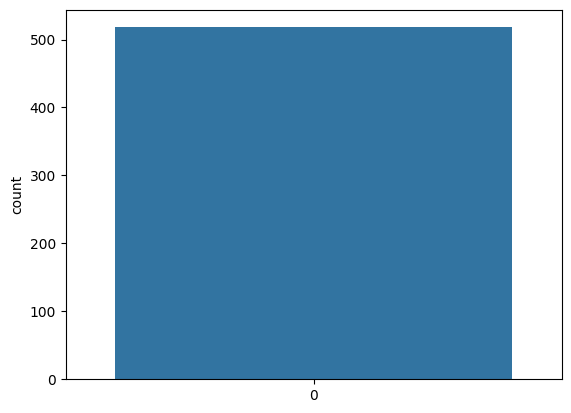

In [6]:
sns.countplot(df['Hospital_Beds'])
plt.show()

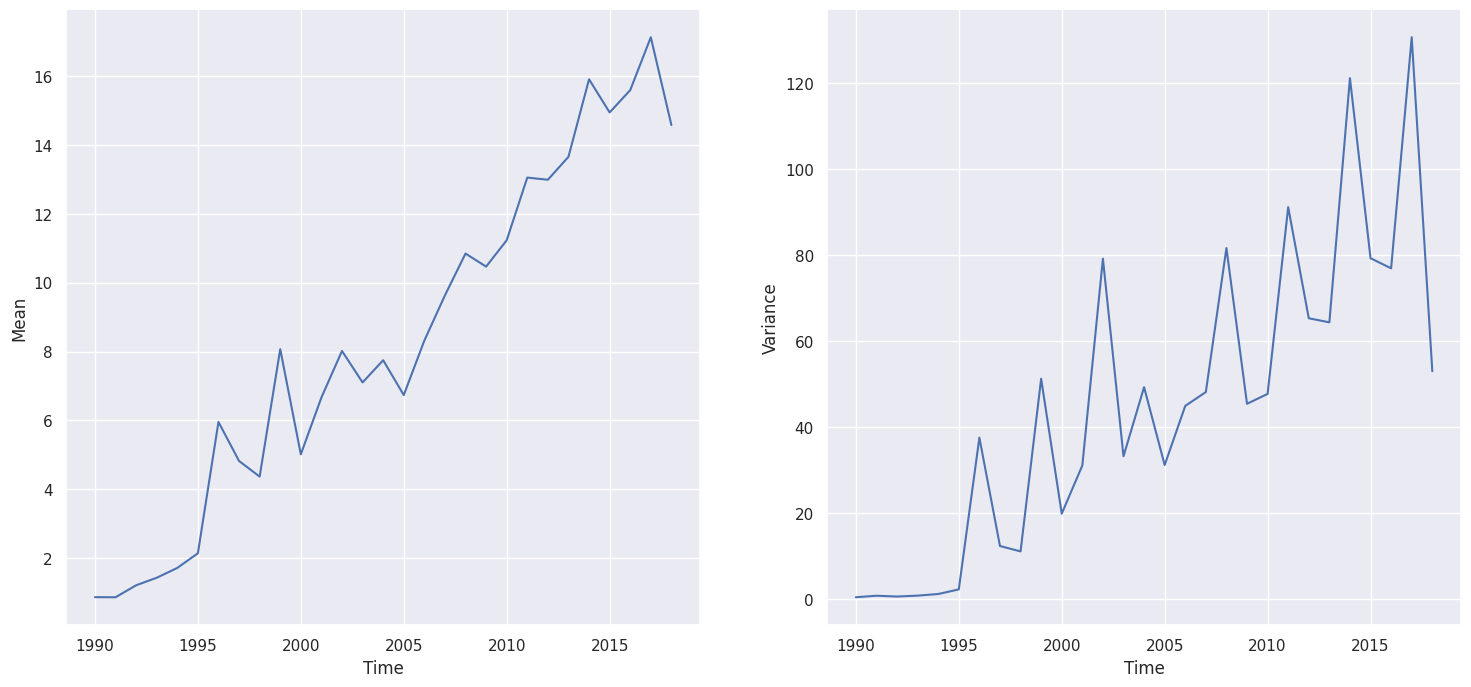

In [7]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(1,2, figsize=(18,8))
df.groupby('Time')['MRI_Units'].mean().plot(ax=ax[0], ylabel='Mean')
df.groupby('Time')['MRI_Units'].var().plot(ax=ax[1], ylabel='Variance')
plt.show()

Text(0.5, 1.0, 'Correlation matrix for each indicator')

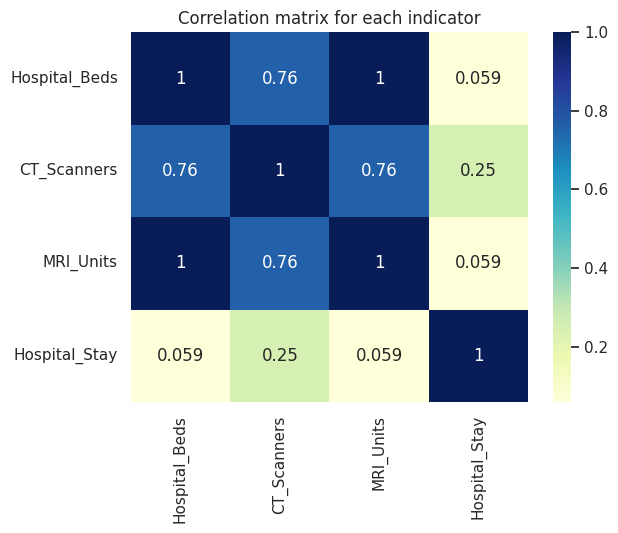

In [8]:
g = sns.heatmap(df[["Hospital_Beds", "CT_Scanners", "MRI_Units", "Hospital_Stay"]].corr(),
                annot=True, cmap="YlGnBu")
g.set_title("Correlation matrix for each indicator")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


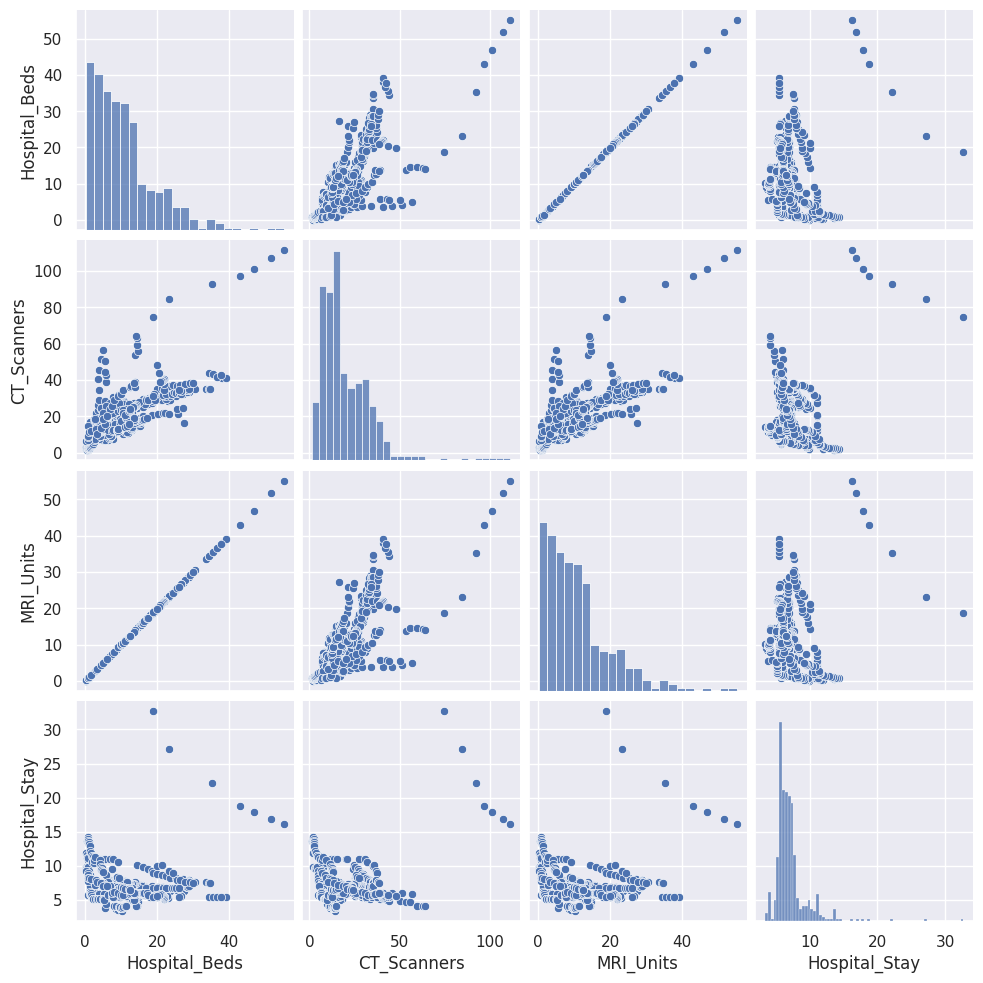

In [9]:
g = sns.pairplot(df[["Hospital_Beds", "CT_Scanners", "MRI_Units", "Hospital_Stay"]])

In [10]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [11]:
def preprocess_inputs(df):
    df = df.copy()
    
    # One-hot encode Location column
    df = onehot_encode(df, column='Location')
    
    # Split df into X and y
    y = df['Hospital_Stay'].copy()
    X = df.drop('Hospital_Stay', axis=1).copy()
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test

In [12]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=123)

In [14]:
models = {
    "                     Linear Regression": LinearRegression(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                               XGBoost": XGBRegressor(),
                                
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.


In [15]:
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))
    

                     Linear Regression R^2 Score: 0.84711
                   K-Nearest Neighbors R^2 Score: 0.86755
                         Decision Tree R^2 Score: 0.93204
                         Random Forest R^2 Score: 0.94858
                     Gradient Boosting R^2 Score: 0.92257
                               XGBoost R^2 Score: 0.94803


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       518 non-null    object 
 1   Time           518 non-null    int64  
 2   Hospital_Stay  518 non-null    float64
 3   MRI_Units      518 non-null    float64
 4   CT_Scanners    518 non-null    float64
 5   Hospital_Beds  518 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 24.4+ KB


In [17]:
# print(x.dtypes)
# print(y.dtypes)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       518 non-null    object 
 1   Time           518 non-null    int64  
 2   Hospital_Stay  518 non-null    float64
 3   MRI_Units      518 non-null    float64
 4   CT_Scanners    518 non-null    float64
 5   Hospital_Beds  518 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 24.4+ KB


In [19]:
# x=df.drop(['Location'],axis=1)
# x=sm.add_constant(x)
# y=df['Location']
# model=sm.OLS(y,x).fit()
# model.summary()

In [20]:
!pip install linearmodels 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 7.5 MB/s eta 0:00:00


In [21]:
df

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53
...,...,...,...,...,...,...
513,LTU,2014,6.8,10.57,22.17,10.57
514,LTU,2015,6.6,11.02,21.00,11.02
515,LTU,2016,6.6,12.20,23.01,12.20
516,LTU,2017,6.5,12.37,23.33,12.37


In [22]:
df = pd.DataFrame(df)

result = df.groupby('Time')['Hospital_Stay'].sum().reset_index()

print(result)
hosp_stay=pd.DataFrame(result)


    Time  Hospital_Stay
0   1990           38.3
1   1991           38.6
2   1992           54.3
3   1993           71.2
4   1994           64.6
5   1995           63.2
6   1996           87.8
7   1997           74.3
8   1998           55.0
9   1999           86.6
10  2000          102.9
11  2001          110.3
12  2002          134.7
13  2003          139.4
14  2004          141.8
15  2005          157.4
16  2006          173.6
17  2007          170.0
18  2008          178.7
19  2009          161.7
20  2010          183.2
21  2011          201.5
22  2012          186.2
23  2013          184.7
24  2014          187.6
25  2015          169.7
26  2016          160.6
27  2017          183.4
28  2018          137.3


In [23]:
df = pd.DataFrame(df)

result = df.groupby('Time')['Hospital_Stay'].sum().reset_index()

print(result)
hosp_stay=pd.DataFrame(result)

    Time  Hospital_Stay
0   1990           38.3
1   1991           38.6
2   1992           54.3
3   1993           71.2
4   1994           64.6
5   1995           63.2
6   1996           87.8
7   1997           74.3
8   1998           55.0
9   1999           86.6
10  2000          102.9
11  2001          110.3
12  2002          134.7
13  2003          139.4
14  2004          141.8
15  2005          157.4
16  2006          173.6
17  2007          170.0
18  2008          178.7
19  2009          161.7
20  2010          183.2
21  2011          201.5
22  2012          186.2
23  2013          184.7
24  2014          187.6
25  2015          169.7
26  2016          160.6
27  2017          183.4
28  2018          137.3


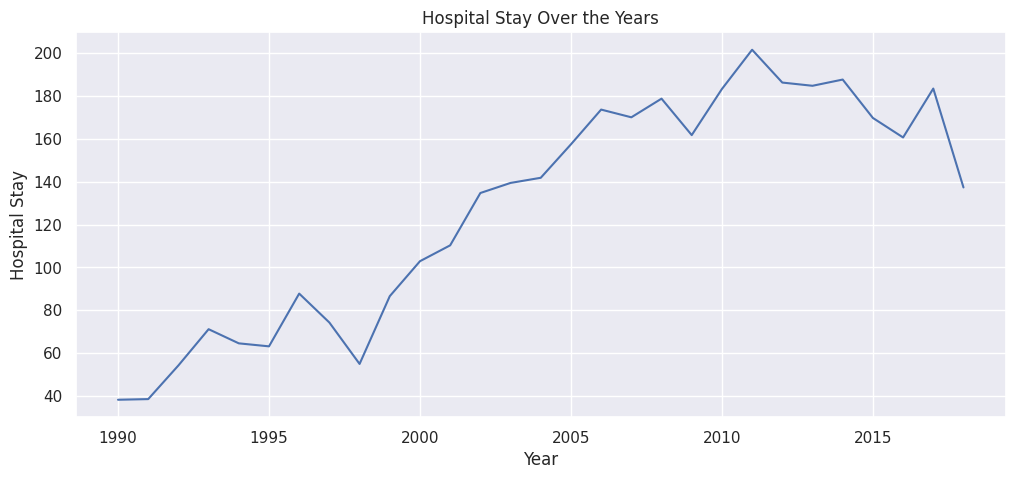

In [24]:
hosp_stay.set_index('Time', inplace=True)
hosp_stay['Hospital_Stay'].plot(x='Time', y='Hospital_Stay', figsize=(12, 5))
plt.title('Hospital Stay Over the Years')
plt.xlabel('Year')
plt.ylabel('Hospital Stay')
plt.grid(True)
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(hosp_stay['Hospital_Stay'])

1. ADF :  -1.448400185754333
2. P-Value :  0.5588653307771834
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression: 22
5. Critical Values :
	 1% :  -3.769732625845229
	 5% :  -3.005425537190083
	 10% :  -2.6425009917355373


In [26]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [27]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(hosp_stay['Hospital_Stay'], trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=242.843, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=243.624, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=243.322, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=241.999, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=245.307, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.318 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   29
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -119.999
Date:                Thu, 30 Nov 2023   AIC                            241.999
Time:                        11:16:29   BIC                            243.331
Sample:                             0   HQIC                           242.406
                                 - 29                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       309.0711     86.060      3.591      0.000     140.397     477.746
===================================================================================
Ljung-Box (L1) (Q):                   0.96   Jarque-Bera (JB):                 2.53
Prob(Q):                              0.33   Prob(JB):                         0.28
Heteroskedasticity (H):               1.49   Skew:                            -0.71
Prob(H) (two-sided):                  0.56   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [29]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [30]:
train=hosp_stay.iloc[:22]
test=hosp_stay.iloc[22:]
train

,Hospital_Stay
Time,
1990,38.3
1991,38.6
1992,54.3
1993,71.2
1994,64.6
1995,63.2
1996,87.8
1997,74.3
1998,55.0


In [31]:
# model=ARIMA(train['Hospital_Stay'])

In [32]:
print(hosp_stay)

      Hospital_Stay
Time               
1990           38.3
1991           38.6
1992           54.3
1993           71.2
1994           64.6
1995           63.2
1996           87.8
1997           74.3
1998           55.0
1999           86.6
2000          102.9
2001          110.3
2002          134.7
2003          139.4
2004          141.8
2005          157.4
2006          173.6
2007          170.0
2008          178.7
2009          161.7
2010          183.2
2011          201.5
2012          186.2
2013          184.7
2014          187.6
2015          169.7
2016          160.6
2017          183.4
2018          137.3


In [33]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Hospital_Stay'], order=(2,1,2))
model = model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Hospital_Stay   No. Observations:                   22
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -84.888
Date:                Thu, 30 Nov 2023   AIC                            179.776
Time:                        11:16:39   BIC                            184.999
Sample:                             0   HQIC                           180.910
                                 - 22                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0539      0.196     -5.366      0.000      -1.439      -0.669
ar.L2         -0.8572      0.247     -3.464      0.001      -1.342      -0.372
ma.L1          1.4271     68.492      0.021      0.983    -132.814     135.668
ma.L2          0.9993     95.987      0.010      0.992    -187.132     189.131
sigma2       158.4106   1.52e+04      0.010      0.992   -2.96e+04    2.99e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.01   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.16   Prob(JB):                         0.70
Heteroskedasticity (H):               1.47   Skew:                            -0.14
Prob(H) (two-sided):                  0.62   Kurtosis:                         2.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)
# pred.plot(legend=True)
# test['Hospital_Stay'].plot(legend=True)

22    192.186340
23    188.965735
24    200.343866
25    191.112980
26    191.088035
27    199.027236
28    190.681324
Name: ARIMA Predictions, dtype: float64


<Axes: xlabel='Time'>

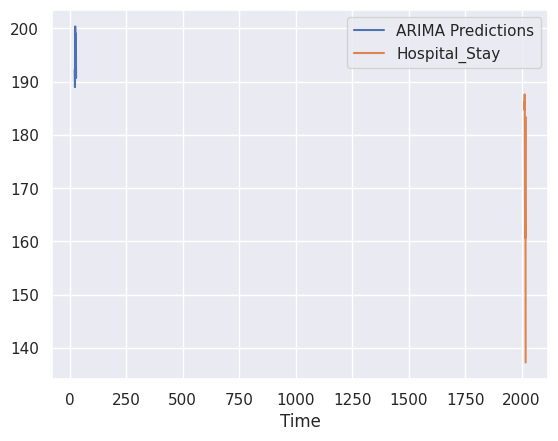

In [35]:
pred.plot(legend=True)
test['Hospital_Stay'].plot(legend=True)

<Axes: >

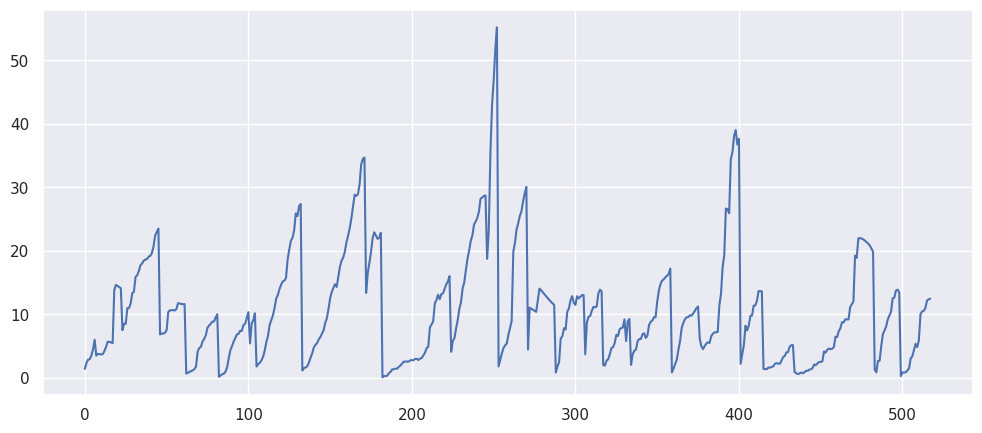

In [36]:
df['Hospital_Beds'].plot(figsize=(12,5))

In [37]:
df = pd.DataFrame(df)

result = df.groupby('Time')['Hospital_Beds'].sum().reset_index()
hospital_beds=pd.DataFrame(result)
print(result)

    Time  Hospital_Beds
0   1990           3.46
1   1991           3.45
2   1992           7.26
3   1993          10.00
4   1994          12.00
5   1995          14.98
6   1996          41.67
7   1997          43.38
8   1998          30.57
9   1999          72.61
10  2000          65.18
11  2001          93.30
12  2002         128.25
13  2003         142.03
14  2004         154.95
15  2005         148.16
16  2006         207.95
17  2007         240.76
18  2008         271.13
19  2009         261.65
20  2010         314.47
21  2011         378.50
22  2012         376.68
23  2013         395.99
24  2014         445.39
25  2015         403.48
26  2016         405.38
27  2017         479.58
28  2018         320.72


In [38]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Hospital_Beds'])


1. ADF :  -5.957769803549919
2. P-Value :  2.0735468076741807e-07
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 517
5. Critical Values :
	 1% :  -3.443061925077973
	 5% :  -2.8671466525252014
	 10% :  -2.5697561378507907


In [39]:
!pip install pmdarima

In [40]:
import pandas as pd
from pmdarima import auto_arima
hospital_beds = df['Hospital_Beds']

stepwise_fit = auto_arima(hospital_beds, trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2976.430, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3712.502, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2972.194, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3326.655, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4181.522, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2973.740, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2973.781, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2974.920, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2991.479, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.846 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1483.097
Date:                Thu, 30 Nov 2023   AIC                           2972.194
Time:                        11:16:50   BIC                           2984.944
Sample:                             0   HQIC                          2977.189
                                - 518                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3377      0.417      3.205      0.001       0.520       2.156
ar.L1          0.8723      0.019     46.575      0.000       0.836       0.909
sigma2        17.9143      0.581     30.828      0.000      16.775      19.053
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):             41703.44
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                            -4.99
Prob(H) (two-sided):                  0.12   Kurtosis:                        45.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
import pandas as pd

Hospital_Beds = df['Hospital_Beds']

print(Hospital_Beds.shape)
train = Hospital_Beds.iloc[:22]
test = Hospital_Beds.iloc[22:]
print(train)
print(test)


(518,)
0      1.43
1      2.36
2      2.89
3      2.96
4      3.53
5      4.51
6      6.01
7      3.52
8      3.79
9      3.74
10     3.70
11     3.76
12     4.26
13     4.89
14     5.72
15     5.67
16     5.60
17     5.50
18    13.84
19    14.65
20    14.49
21    14.30
Name: Hospital_Beds, dtype: float64
22     14.15
23      7.54
24      8.53
25      8.52
26     11.01
       ...  
513    10.57
514    11.02
515    12.20
516    12.37
517    12.49
Name: Hospital_Beds, Length: 496, dtype: float64


In [42]:
!pip install statsmodels

In [43]:
df = pd.DataFrame(df)

result = df.groupby('Time')['Hospital_Beds'].sum().reset_index()
hospital_beds=pd.DataFrame(result)
print(result)

    Time  Hospital_Beds
0   1990           3.46
1   1991           3.45
2   1992           7.26
3   1993          10.00
4   1994          12.00
5   1995          14.98
6   1996          41.67
7   1997          43.38
8   1998          30.57
9   1999          72.61
10  2000          65.18
11  2001          93.30
12  2002         128.25
13  2003         142.03
14  2004         154.95
15  2005         148.16
16  2006         207.95
17  2007         240.76
18  2008         271.13
19  2009         261.65
20  2010         314.47
21  2011         378.50
22  2012         376.68
23  2013         395.99
24  2014         445.39
25  2015         403.48
26  2016         405.38
27  2017         479.58
28  2018         320.72


In [44]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train' is a DataFrame with the correct column name
model = ARIMA(train, order=(2, 1, 2))
model = model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Hospital_Beds   No. Observations:                   22
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -43.884
Date:                Thu, 30 Nov 2023   AIC                             97.769
Time:                        11:17:01   BIC                            102.991
Sample:                             0   HQIC                            98.902
                                 - 22                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0008      0.065      0.012      0.990      -0.126       0.128
ar.L2          0.9992      0.061     16.251      0.000       0.879       1.120
ma.L1         -0.0081      0.926     -0.009      0.993      -1.823       1.807
ma.L2         -0.9915      0.601     -1.650      0.099      -2.169       0.186
sigma2         3.5894      0.401      8.961      0.000       2.804       4.375
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               122.46
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               6.14   Skew:                             2.93
Prob(H) (two-sided):                  0.03   Kurtosis:                        13.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.54e+17. Standard errors may be unstable.
"""

In [45]:
print(hospital_beds.shape)
train=hospital_beds.iloc[:22]
test=hospital_beds.iloc[22:]
print(train)
print(test)

(29, 2)
    Time  Hospital_Beds
0   1990           3.46
1   1991           3.45
2   1992           7.26
3   1993          10.00
4   1994          12.00
5   1995          14.98
6   1996          41.67
7   1997          43.38
8   1998          30.57
9   1999          72.61
10  2000          65.18
11  2001          93.30
12  2002         128.25
13  2003         142.03
14  2004         154.95
15  2005         148.16
16  2006         207.95
17  2007         240.76
18  2008         271.13
19  2009         261.65
20  2010         314.47
21  2011         378.50
    Time  Hospital_Beds
22  2012         376.68
23  2013         395.99
24  2014         445.39
25  2015         403.48
26  2016         405.38
27  2017         479.58
28  2018         320.72


In [46]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Hospital_Beds'], order=(2, 1,2))
model = model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Hospital_Beds   No. Observations:                   22
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -96.125
Date:                Thu, 30 Nov 2023   AIC                            202.249
Time:                        11:17:01   BIC                            207.472
Sample:                             0   HQIC                           203.383
                                 - 22                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0965      1.211      0.080      0.936      -2.278       2.471
ar.L2          0.8617      1.132      0.762      0.446      -1.356       3.079
ma.L1          0.1899    337.404      0.001      1.000    -661.110     661.490
ma.L2         -0.8098    273.143     -0.003      0.998    -536.159     534.540
sigma2       505.8699    1.7e+05      0.003      0.998   -3.33e+05    3.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.33   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.13   Prob(JB):                         0.78
Heteroskedasticity (H):              10.89   Skew:                             0.19
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

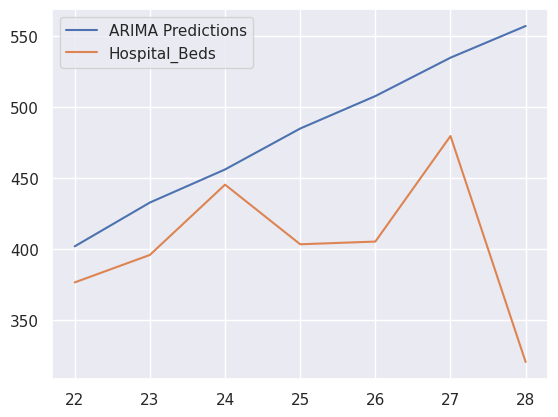

In [47]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Hospital_Beds'].plot(legend=True)

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Hospital_Beds'].mean()
rmse=sqrt(mean_squared_error(pred,test['Hospital_Beds']))
print(rmse)

105.56707597348395


In [49]:
print(test['Hospital_Beds'])

22    376.68
23    395.99
24    445.39
25    403.48
26    405.38
27    479.58
28    320.72
Name: Hospital_Beds, dtype: float64


In [50]:
print(pred)

22    402.032589
23    432.817550
24    456.067732
25    484.839784
26    507.652274
27    534.647552
28    556.911339
Name: ARIMA Predictions, dtype: float64


In [51]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Hospital_Beds'], order=(2,2,2))
model = model.fit()
index_future_dates = pd.date_range(start='2019', periods=22, freq='Y')

pred = model.get_prediction(start=len(hospital_beds), end=len(hospital_beds) + 21, dynamic=False)
pred_conf = pred.conf_int()

pred_values = pred.predicted_mean.rename('ARIMA Predictions till 2040')

pred_values.index = index_future_dates
print(pred_values)

2019-12-31     666.166564
2020-12-31     706.102140
2021-12-31     745.684995
2022-12-31     785.514880
2023-12-31     825.508891
2024-12-31     865.442113
2025-12-31     905.307665
2026-12-31     945.183793
2027-12-31     985.085495
2028-12-31    1024.987574
2029-12-31    1064.880690
2030-12-31    1104.772234
2031-12-31    1144.666688
2032-12-31    1184.562163
2033-12-31    1224.456776
2034-12-31    1264.350890
2035-12-31    1304.245228
2036-12-31    1344.139779
2037-12-31    1384.034284
2038-12-31    1423.928707
2039-12-31    1463.823133
2040-12-31    1503.717588
Freq: A-DEC, Name: ARIMA Predictions till 2040, dtype: float64


<Axes: >

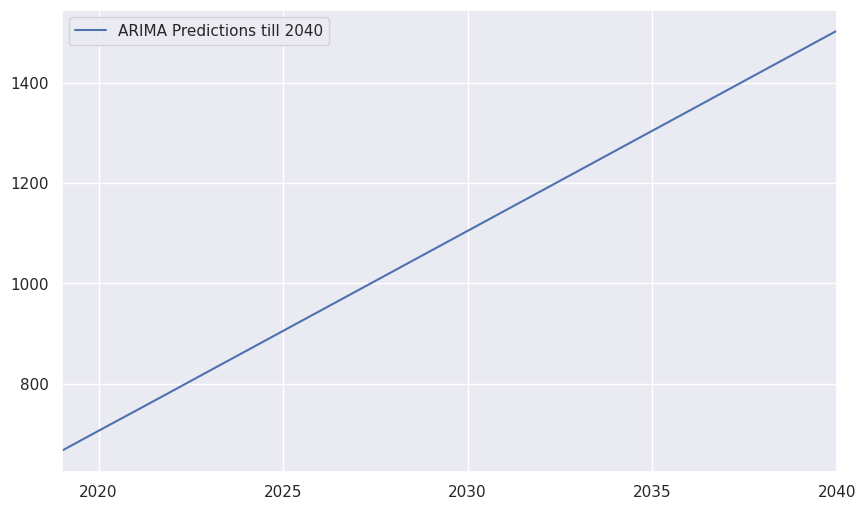

In [52]:
pred_values.plot(figsize=(10,6),legend=True)

In [53]:
pip install -i https://anaconda.org/conda-forge/linearmodels

ERROR: You must give at least one requirement to install (see "pip help install")
Note: you may need to restart the kernel to use updated packages.


<Axes: >

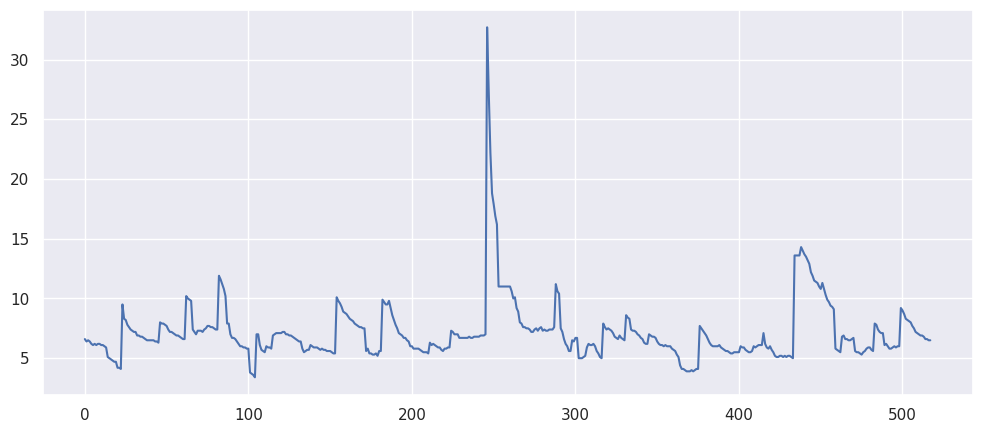

In [54]:
df['Hospital_Stay'].plot(figsize=(12,5))

In [55]:
df = pd.DataFrame(df)

result = df.groupby('Time')['MRI_Units'].sum().reset_index()
mri_units=pd.DataFrame(result)
print(result)

    Time  MRI_Units
0   1990       3.46
1   1991       3.45
2   1992       7.26
3   1993      10.00
4   1994      12.00
5   1995      14.98
6   1996      41.67
7   1997      43.38
8   1998      30.57
9   1999      72.61
10  2000      65.18
11  2001      93.30
12  2002     128.25
13  2003     142.03
14  2004     154.95
15  2005     148.16
16  2006     207.95
17  2007     240.76
18  2008     271.13
19  2009     261.65
20  2010     314.47
21  2011     378.50
22  2012     376.68
23  2013     395.99
24  2014     445.39
25  2015     403.48
26  2016     405.38
27  2017     479.58
28  2018     320.72


In [56]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['MRI_Units'])

1. ADF :  -5.957769803549919
2. P-Value :  2.0735468076741807e-07
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 517
5. Critical Values :
	 1% :  -3.443061925077973
	 5% :  -2.8671466525252014
	 10% :  -2.5697561378507907


In [57]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(mri_units['MRI_Units'], trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=290.880, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=292.791, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=290.010, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=291.022, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=292.757, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=290.791, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=291.613, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=294.010, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=293.811, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.409 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   29
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -142.005
Date:                Thu, 30 Nov 2023   AIC                            290.010
Time:                        11:17:04   BIC                            294.007
Sample:                             0   HQIC                           291.232
                                 - 29                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     22.0582     11.936      1.848      0.065      -1.335      45.451
ar.L1         -0.5963      0.258     -2.314      0.021      -1.101      -0.091
sigma2      1465.1252    341.537      4.290      0.000     795.725    2134.526
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                22.90
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):              11.75   Skew:                            -1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
print(mri_units.shape)
train=mri_units.iloc[:22]
test=mri_units.iloc[22:]
print(train)
print(test)

(29, 2)
    Time  MRI_Units
0   1990       3.46
1   1991       3.45
2   1992       7.26
3   1993      10.00
4   1994      12.00
5   1995      14.98
6   1996      41.67
7   1997      43.38
8   1998      30.57
9   1999      72.61
10  2000      65.18
11  2001      93.30
12  2002     128.25
13  2003     142.03
14  2004     154.95
15  2005     148.16
16  2006     207.95
17  2007     240.76
18  2008     271.13
19  2009     261.65
20  2010     314.47
21  2011     378.50
    Time  MRI_Units
22  2012     376.68
23  2013     395.99
24  2014     445.39
25  2015     403.48
26  2016     405.38
27  2017     479.58
28  2018     320.72


In [59]:
!pip install statsmodels

In [60]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['MRI_Units'], order=(2, 1,2))
model = model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              MRI_Units   No. Observations:                   22
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -96.125
Date:                Thu, 30 Nov 2023   AIC                            202.249
Time:                        11:17:14   BIC                            207.472
Sample:                             0   HQIC                           203.383
                                 - 22                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0965      1.211      0.080      0.936      -2.278       2.471
ar.L2          0.8617      1.132      0.762      0.446      -1.356       3.079
ma.L1          0.1899    337.404      0.001      1.000    -661.110     661.490
ma.L2         -0.8098    273.143     -0.003      0.998    -536.159     534.540
sigma2       505.8699    1.7e+05      0.003      0.998   -3.33e+05    3.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.33   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.13   Prob(JB):                         0.78
Heteroskedasticity (H):              10.89   Skew:                             0.19
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

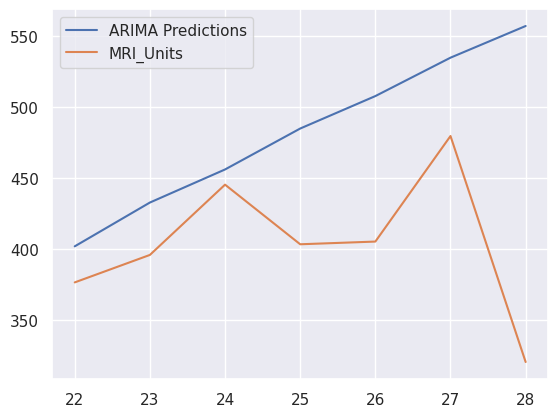

In [61]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['MRI_Units'].plot(legend=True)

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['MRI_Units'].mean()
rmse=sqrt(mean_squared_error(pred,test['MRI_Units']))
print(rmse)

105.56707597348395


In [63]:
print(test['MRI_Units'])

22    376.68
23    395.99
24    445.39
25    403.48
26    405.38
27    479.58
28    320.72
Name: MRI_Units, dtype: float64


In [64]:
print(pred)

22    402.032589
23    432.817550
24    456.067732
25    484.839784
26    507.652274
27    534.647552
28    556.911339
Name: ARIMA Predictions, dtype: float64


In [65]:
model2=ARIMA(df["MRI_Units"],order=(2,1,2))
model2=model2.fit()
print(model2)

In [66]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['MRI_Units'], order=(2,1,2))
model = model.fit()
index_future_dates = pd.date_range(start='2019', periods=22, freq='Y')

pred = model.get_prediction(start=len(mri_units), end=len(mri_units) + 21, dynamic=False)
pred_conf = pred.conf_int()

pred_values = pred.predicted_mean.rename('ARIMA Predictions till 2040')

pred_values.index = index_future_dates
print(pred_values)

2019-12-31    582.322601
2020-12-31    603.960639
2021-12-31    627.946545
2022-12-31    648.907761
2023-12-31    671.600097
2024-12-31    691.853208
2025-12-31    713.362513
2026-12-31    732.891230
2027-12-31    753.311184
2028-12-31    772.110520
2029-12-31    791.521362
2030-12-31    809.594765
2031-12-31    828.065972
2032-12-31    845.423121
2033-12-31    863.015495
2034-12-31    879.670600
2035-12-31    896.437906
2036-12-31    912.408404
2037-12-31    928.398654
2038-12-31    943.704204
2039-12-31    958.960669
2040-12-31    973.622391
Freq: A-DEC, Name: ARIMA Predictions till 2040, dtype: float64


<Axes: >

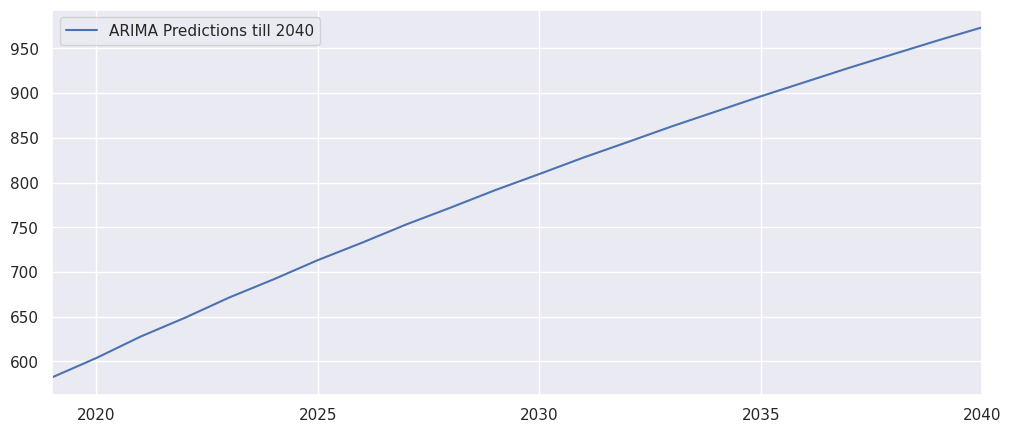

In [67]:
pred_values.plot(figsize=(12,5),legend=True)